In [1]:
#not sure what this does
!pip install mysql-connector-python

In [2]:
from bs4 import BeautifulSoup as bs
import mysql.connector
from mysql.connector import errorcode
import re
import json
import requests as rq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
imdb_pop_tv_request = rq.get('https://www.imdb.com/chart/tvmeter/?sort=ir,desc&mode=simple&page=1')

In [4]:
imdb_soup = bs(imdb_pop_tv_request.content, 'html.parser')
imdb_soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Most Popular TV - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadT

In [5]:
list(imdb_soup.children)[3]

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Most Popular TV - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if

In [6]:
[type(item) for item in list(imdb_soup.children)]

[bs4.element.NavigableString,
 bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [7]:
first_imdb_parse = imdb_soup.find('tbody', class_='lister-list')
print(first_imdb_parse)

<tbody class="lister-list">
<tr>
<td class="posterColumn">
<span data-value="43" name="rk"></span>
<span data-value="9.5" name="ir"></span>
<span data-value="1.2007872E12" name="us"></span>
<span data-value="1304896" name="nv"></span>
<span data-value="-1.5" name="ur"></span>
<a href="/title/tt0903747/"> <img alt="Breaking Bad" height="67" src="https://m.media-amazon.com/images/M/MV5BMjhiMzgxZTctNDc1Ni00OTIxLTlhMTYtZTA3ZWFkODRkNmE2XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY67_CR1,0,45,67_AL_.jpg" width="45"/>
</a> </td>
<td class="titleColumn">
<a href="/title/tt0903747/" title="Bryan Cranston, Aaron Paul">Breaking Bad</a>
<span class="secondaryInfo">(2008)</span>
<div class="velocity">43
<span class="secondaryInfo">(
<span class="global-sprite titlemeter up"></span>
12)</span>
</div>
</td>
<td class="ratingColumn imdbRating">
<strong title="9.5 based on 1,304,896 user ratings">9.5</strong>
</td>
<td class="ratingColumn">
<div class="seen-widget seen-widget-tt0903747 pending" data-titleid="tt0

In [8]:
second_imdb_parse = first_imdb_parse.select('a img')[0].attrs['alt']
second_imdb_parse

'Breaking Bad'

In [9]:
third_imdb_parse = first_imdb_parse.find_all('strong')[0].string
third_imdb_parse

'9.5'

In [10]:
fourth_imdb_parse = first_imdb_parse.select('div', class_='velocity')[11]
fourth_imdb_parse

<div class="velocity">73
<span class="secondaryInfo">(
<span class="global-sprite titlemeter down"></span>
7)</span>
</div>

In [11]:
fourth_imdb_parse = first_imdb_parse.select('div', class_='velocity')[0]
fourth_imdb_parse.text.split()[0]

'43'

In [12]:
url_imdb_parse = first_imdb_parse.find_all(href = True)[0].attrs['href']
url_imdb_parse

'/title/tt0903747/'

In [13]:
url_list = []
for i in range(0, len(first_imdb_parse.find_all(href = True)), 2):
    url_list.append('http://imdb.com{}?'.format(first_imdb_parse.find_all(href = True)[i].attrs['href']))
len(url_list)

100

In [14]:
title_list = []
rating_list = []
user_count_list = []
velocity_list = []
for i in range(0, 100):
    title_list.append(first_imdb_parse.select('a img')[i].attrs['alt'])
    rating_list.append(first_imdb_parse.find_all('strong')[i].string)
    user_count_list.append(first_imdb_parse.find_all('strong')[i]['title'].split()[-3])
    velocity_list.append(first_imdb_parse.find_all('div', class_='velocity')[i].text.split()[0])

In [15]:
d = {'Title' : title_list, 'Rating' : rating_list, 'Reviews' : user_count_list, 'Velocity' : velocity_list}
df = pd.DataFrame(d)
df.head()
#df.tail()

Title Rating    Reviews Velocity
0     Breaking Bad    9.5  1,304,896       43
1        Chernobyl    9.4    413,589       73
2  Game of Thrones    9.3  1,634,576       12
3   Rick and Morty    9.3    318,475       53
4     The Sopranos    9.2    268,856       65

In [16]:
url_list = []
for i in range(0, len(first_imdb_parse.find_all(href = True)), 2):
    url_list.append('http://imdb.com{}?'.format(first_imdb_parse.find_all(href = True)[i].attrs['href']))
len(url_list)

100

In [17]:
imdb_genre_request = rq.get(url_list[0])
genre_soup = bs(imdb_genre_request.content, 'html.parser')
genre_soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt0903747?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Breaking Bad (TV Series 2008–2013) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1})

In [18]:
first_genre_parse = genre_soup.find_all('div', class_="see-more inline canwrap")[1].text.split()
genre_list = []
for i in range(0, len(first_genre_parse), 2):
    genre_list.append(first_genre_parse[i-1])
print(genre_list)

['Thriller', 'Crime', 'Drama']


In [19]:
genre_list = []
for i in range(0, len(url_list)):
    imdb_genre_request = rq.get(url_list[i])
    genre_soup = bs(imdb_genre_request.content, 'html.parser')
    try:
        parse = genre_soup.find_all('div', class_="see-more inline canwrap")[1].text.split()
    except IndexError:
        parse = genre_soup.find_all('div', class_="see-more inline canwrap")[0].text.split()
    another_list = []
    for j in range(0, len(parse), 2):
        another_list.append((parse[j-1]))
    genre_list.append(another_list)
print(genre_list)

[['Thriller', 'Crime', 'Drama'], ['Thriller', 'Drama', 'History'], ['Romance', 'Action', 'Adventure', 'Drama', 'Fantasy'], ['Sci-Fi', 'Animation', 'Adventure', 'Comedy'], ['Drama', 'Crime'], ['Thriller', 'Crime', 'Drama', 'Mystery'], ['Romance', 'Comedy'], ['Thriller', 'Crime', 'Drama'], ['Sci-Fi', 'Action', 'Adventure'], ['Drama', 'Crime'], ['Comedy'], ['Drama', 'Comedy'], ['Thriller', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Sci-Fi'], ['Thriller', 'Drama', 'Sci-Fi'], ['Comedy'], ['Sci-Fi', 'Action', 'Adventure', 'Drama'], ['History', 'Drama'], ['Comedy'], ['Romance', 'Comedy', 'Drama'], ['Drama', 'Comedy'], ['Sci-Fi', 'Action', 'Comedy', 'Crime'], ['Drama', 'Crime'], ['Western', 'Drama', 'Mystery', 'Sci-Fi'], ['War', 'Action', 'Adventure', 'Drama', 'History', 'Romance'], ['Sci-Fi', 'Adventure', 'Drama', 'Family', 'Mystery'], ['Drama', 'Comedy'], ['Drama'], ['Sci-Fi', 'Action', 'Adventure', 'Mystery'], ['Thriller', 'Crime', 'Drama'], ['Thriller', 'Drama', 'Mystery', 'Sci-Fi'], ['Thri

In [20]:
df.head()

Title Rating    Reviews Velocity
0     Breaking Bad    9.5  1,304,896       43
1        Chernobyl    9.4    413,589       73
2  Game of Thrones    9.3  1,634,576       12
3   Rick and Morty    9.3    318,475       53
4     The Sopranos    9.2    268,856       65

In [21]:
api_key = '4e782fec9cc9d78e74fc875c7850809c'
response_list =[]
for i in range(1, 20, 1):
    response_list.append(rq.get('https://api.themoviedb.org/3/tv/top_rated?api_key={}&language=en-US&page={}'.format(api_key, i)).json())

In [22]:
print(len(response_list))
print(len(response_list[0]))

19
4


In [23]:
response_list

[{'page': 1,
  'total_results': 697,
  'total_pages': 35,
  'results': [{'original_name': 'I Am Not an Animal',
    'genre_ids': [16, 35],
    'name': 'I Am Not an Animal',
    'popularity': 12.739,
    'origin_country': ['GB'],
    'vote_count': 389,
    'first_air_date': '2004-05-10',
    'backdrop_path': '/ok1YiumqOCYzUmuTktnupOQOvV5.jpg',
    'original_language': 'en',
    'id': 100,
    'vote_average': 9.4,
    'overview': 'I Am Not An Animal is an animated comedy series about the only six talking animals in the world, whose cosseted existence in a vivisection unit is turned upside down when they are liberated by animal rights activists.',
    'poster_path': '/nMhv6jG5dtLdW7rgguYWvpbk0YN.jpg'},
   {'original_name': 'Chernobyl',
    'genre_ids': [18],
    'name': 'Chernobyl',
    'popularity': 33.857,
    'origin_country': ['US'],
    'vote_count': 794,
    'first_air_date': '2019-05-06',
    'backdrop_path': '/cDpR6URVghK5LC7G7NgPkCP8x6E.jpg',
    'original_language': 'en',
    'i

In [24]:
response_list[1]['results']

[{'original_name': "Monty Python's Flying Circus",
  'id': 849,
  'name': "Monty Python's Flying Circus",
  'popularity': 11.82,
  'vote_count': 284,
  'vote_average': 8.3,
  'first_air_date': '1969-10-05',
  'poster_path': '/nKiyYqYcRcQLgkLk0LFtRgtGMen.jpg',
  'genre_ids': [35],
  'original_language': 'en',
  'backdrop_path': '/94QIoiDB7wrgFBh8abWGwqs1FE1.jpg',
  'overview': 'A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.',
  'origin_country': ['GB']},
 {'original_name': 'True Detective',
  'id': 46648,
  'name': 'True Detective',
  'popularity': 28.115,
  'vote_count': 1307,
  'vote_average': 8.3,
  'first_air_date': '2014-01-12',
  'poster_path': '/aowr4xpLP5sRCL50TkuADomJ98T.jpg',
  'genre_ids': [18],
  'original_language': 'en',
  'backdrop_path': '/2Ahm0YjLNQKuzSf9LOkHrXk8qIE.jpg',
  'overview': 'An American anthology police detective series utilizing multiple t

In [25]:
response_list[0]['results'][0]

{'original_name': 'I Am Not an Animal',
 'genre_ids': [16, 35],
 'name': 'I Am Not an Animal',
 'popularity': 12.739,
 'origin_country': ['GB'],
 'vote_count': 389,
 'first_air_date': '2004-05-10',
 'backdrop_path': '/ok1YiumqOCYzUmuTktnupOQOvV5.jpg',
 'original_language': 'en',
 'id': 100,
 'vote_average': 9.4,
 'overview': 'I Am Not An Animal is an animated comedy series about the only six talking animals in the world, whose cosseted existence in a vivisection unit is turned upside down when they are liberated by animal rights activists.',
 'poster_path': '/nMhv6jG5dtLdW7rgguYWvpbk0YN.jpg'}

In [26]:
name_list = []
popularity_list = []
country_list = []
year_list = []
rating_list = []
other_genre_list = []
show_id_list = []
for page in range(19): # number of pages
    for i in range(len(response_list[page]['results'])):
        name_list.append(response_list[page]['results'][i]['name'])
        popularity_list.append(response_list[page]['results'][i]['popularity'])
        country_list.append(response_list[page]['results'][i]['origin_country'])
        year_list.append(response_list[page]['results'][i]['first_air_date'][0:4])
        rating_list.append(response_list[page]['results'][i]['vote_average'])
        other_genre_list.append(response_list[page]['results'][i]['genre_ids'])
        show_id_list.append(response_list[page]['results'][i]['id'])
defcon1 = {'Show ID' : show_id_list, 'Name' : name_list, 'Popularity' : popularity_list, 'Country' : country_list, 'Year' : year_list, 'Rating' : rating_list, 'Genre' : other_genre_list}
new_df = pd.DataFrame(defcon1)

In [27]:
new_df.head(15)

Show ID                        Name  Popularity Country  Year  Rating  \
0       100          I Am Not an Animal      12.739    [GB]  2004     9.4   
1     87108                   Chernobyl      33.857    [US]  2019     8.7   
2     60625              Rick and Morty     155.733    [US]  2013     8.6   
3      1396                Breaking Bad      60.149    [US]  2008     8.5   
4     13916                  Death Note      30.752    [JP]  2006     8.4   
5     19885                    Sherlock      29.031    [GB]  2010     8.3   
6     60574              Peaky Blinders      33.152    [GB]  2013     8.3   
7      6357           The Twilight Zone      12.150    [US]  1959     8.3   
8     66732             Stranger Things      43.673    [US]  2016     8.3   
9     33217               Young Justice      15.250    [US]  2010     8.3   
10    40075               Gravity Falls      22.292    [US]  2012     8.3   
11      246  Avatar: The Last Airbender      12.889    [US]  2005     8.3   
12    46298             Hunter x Hunter      52.194    [JP]  2011     8.3   
13    74387                 Final Space      15.796    [US]  2018     8.3   
14     1438                    The Wire      23.264    [US]  2002     8.3   

                    Genre  
0                [16, 35]  
1                    [18]  
2         [16, 35, 10765]  
3                    [18]  
4              [16, 9648]  
5          [80, 18, 9648]  
6                [80, 18]  
7       [18, 9648, 10765]  
8       [18, 9648, 10765]  
9             [16, 10759]  
10  [16, 35, 9648, 10765]  
11       [28, 12, 16, 14]  
12    [16, 35, 18, 10759]  
13     [16, 10759, 10765]  
14               [80, 18]

In [28]:
api_key = '4e782fec9cc9d78e74fc875c7850809c'
genre_name_list =[]
for i in show_id_list:
    genre_name_list.append(rq.get('https://api.themoviedb.org/3/tv/{}?api_key={}&language=en-US'.format(i, api_key)).json())

In [29]:
print(genre_name_list)

[{'backdrop_path': '/ok1YiumqOCYzUmuTktnupOQOvV5.jpg', 'created_by': [], 'episode_run_time': [30], 'first_air_date': '2004-05-10', 'genres': [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}], 'homepage': '', 'id': 100, 'in_production': False, 'languages': ['en'], 'last_air_date': '2004-06-14', 'last_episode_to_air': {'air_date': '2004-06-14', 'episode_number': 6, 'id': 4697, 'name': 'Home', 'overview': 'As the reality show comes to an end, the animals are set free.', 'production_code': '', 'season_number': 1, 'show_id': 100, 'still_path': None, 'vote_average': 0.0, 'vote_count': 0}, 'name': 'I Am Not an Animal', 'next_episode_to_air': None, 'networks': [{'name': 'BBC Two', 'id': 332, 'logo_path': '/bfAVKGrJGcKTAndYktB7cf8UlBO.png', 'origin_country': 'GB'}], 'number_of_episodes': 6, 'number_of_seasons': 1, 'origin_country': ['GB'], 'original_language': 'en', 'original_name': 'I Am Not an Animal', 'overview': 'I Am Not An Animal is an animated comedy series about the only s

In [30]:
actual_genre_list = []
for i in genre_name_list:
    actual_genre_list.append(i['genres'])

In [31]:
print(actual_genre_list)

[[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}], [{'id': 18, 'name': 'Drama'}], [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10765, 'name': 'Sci-Fi & Fantasy'}], [{'id': 18, 'name': 'Drama'}], [{'id': 16, 'name': 'Animation'}, {'id': 9648, 'name': 'Mystery'}], [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 9648, 'name': 'Mystery'}], [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}], [{'id': 18, 'name': 'Drama'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10765, 'name': 'Sci-Fi & Fantasy'}], [{'id': 9648, 'name': 'Mystery'}, {'id': 10765, 'name': 'Sci-Fi & Fantasy'}, {'id': 18, 'name': 'Drama'}], [{'id': 10759, 'name': 'Action & Adventure'}, {'id': 16, 'name': 'Animation'}], [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10765, 'name': 'Sci-Fi & Fantasy'}], [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 14, 

In [32]:
another_one = []
final_one = []
for i in actual_genre_list:
    for j in range(len(i)):
        another_one.append(i[j]['name'])
    final_one.append(another_one)
    another_one = []
print(final_one)

[['Animation', 'Comedy'], ['Drama'], ['Animation', 'Comedy', 'Sci-Fi & Fantasy'], ['Drama'], ['Animation', 'Mystery'], ['Crime', 'Drama', 'Mystery'], ['Drama', 'Crime'], ['Drama', 'Mystery', 'Sci-Fi & Fantasy'], ['Mystery', 'Sci-Fi & Fantasy', 'Drama'], ['Action & Adventure', 'Animation'], ['Animation', 'Comedy', 'Mystery', 'Sci-Fi & Fantasy'], ['Action', 'Adventure', 'Animation', 'Fantasy'], ['Action & Adventure', 'Animation', 'Comedy', 'Drama'], ['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy'], ['Drama', 'Crime'], ['Action & Adventure', 'Animation', 'Drama', 'Mystery'], ['Drama'], ['Comedy'], ['Documentary'], ['Comedy', 'Drama'], ['Comedy'], ['Drama'], ['Action & Adventure', 'Animation'], ['Documentary'], ['Crime', 'Drama'], ['Action & Adventure', 'Drama'], ['Mystery', 'Drama'], ['Animation', 'Comedy'], ['Action & Adventure', 'Animation', 'Drama', 'Mystery'], ['Drama', 'Action & Adventure', 'War & Politics'], ['Documentary'], ['Sci-Fi & Fantasy', 'Drama'], ['Drama', 'Comedy', 

In [33]:
new_df['Genre'] = final_one

In [34]:
new_df.sort_values('Popularity', inplace=True, ascending=False)
new_df

Show ID                                           Name  Popularity  \
327    44217                                        Vikings     155.957   
2      60625                                 Rick and Morty     155.733   
355     1622                                   Supernatural     139.520   
377    69050                                      Riverdale     100.477   
121    81356                                  Sex Education      87.559   
..       ...                                            ...         ...   
201    62104                          The Seven Deadly Sins       6.719   
241    40546                               The 10th Kingdom       6.587   
99      1618                                 Justice League       5.795   
294     2228                            Pinky and the Brain       5.437   
115    61929  The Jinx: The Life and Deaths of Robert Durst       5.303   

    Country  Year  Rating                                              Genre  
327    [CA]  2013     7.5                        [Action & Adventure, Drama]  
2      [US]  2013     8.6              [Animation, Comedy, Sci-Fi & Fantasy]  
355    [US]  2005     7.5                 [Drama, Mystery, Sci-Fi & Fantasy]  
377    [US]  2017     7.4                                   [Drama, Mystery]  
121    [GB]  2019     8.1                                    [Comedy, Drama]  
..      ...   ...     ...                                                ...  
201    [JP]  2014     7.8  [Action & Adventure, Animation, Sci-Fi & Fantasy]  
241    [US]  2000     7.7     [Sci-Fi & Fantasy, Comedy, Action & Adventure]  
99     [US]  2001     8.1  [Action & Adventure, Animation, Sci-Fi & Fantasy]  
294    [US]  1995     7.6                                [Animation, Comedy]  
115    [US]  2015     8.0                                      [Documentary]  

[380 rows x 7 columns]

In [35]:
new_df.head(15)

Show ID                            Name  Popularity Country  Year  \
327    44217                         Vikings     155.957    [CA]  2013   
2      60625                  Rick and Morty     155.733    [US]  2013   
355     1622                    Supernatural     139.520    [US]  2005   
377    69050                       Riverdale     100.477    [US]  2017   
121    81356                   Sex Education      87.559    [GB]  2019   
379     4057                  Criminal Minds      81.511    [US]  2005   
102    82856                 The Mandalorian      79.869    [US]  2019   
143    79460                        Legacies      74.295    [US]  2018   
233    79242  Chilling Adventures of Sabrina      69.837    [US]  2018   
203    71712                 The Good Doctor      68.361    [US]  2017   
202     2190                      South Park      67.589    [US]  1997   
61      1399                 Game of Thrones      66.319    [US]  2011   
286    44006                    Chicago Fire      65.790    [US]  2012   
288    31910                Naruto Shippūden      65.501    [JP]  2007   
132     1668                         Friends      65.397    [US]  1994   

     Rating                                   Genre  
327     7.5             [Action & Adventure, Drama]  
2       8.6   [Animation, Comedy, Sci-Fi & Fantasy]  
355     7.5      [Drama, Mystery, Sci-Fi & Fantasy]  
377     7.4                        [Drama, Mystery]  
121     8.1                         [Comedy, Drama]  
379     7.4                 [Crime, Drama, Mystery]  
102     8.1  [Sci-Fi & Fantasy, Action & Adventure]  
143     8.0               [Sci-Fi & Fantasy, Drama]  
233     7.8      [Mystery, Sci-Fi & Fantasy, Drama]  
203     7.8                                 [Drama]  
202     7.8                     [Comedy, Animation]  
61      8.2               [Sci-Fi & Fantasy, Drama]  
286     7.7                                 [Drama]  
288     7.6              [Animation, Comedy, Drama]  
132     8.0                         [Comedy, Drama]

In [36]:
df.head()

Title Rating    Reviews Velocity
0     Breaking Bad    9.5  1,304,896       43
1        Chernobyl    9.4    413,589       73
2  Game of Thrones    9.3  1,634,576       12
3   Rick and Morty    9.3    318,475       53
4     The Sopranos    9.2    268,856       65

In [37]:
#Database name initialized
movie_db = "movie_db"

In [38]:
#AWS server/db connection
cnx = mysql.connector.connect(
    host = "rds.amazonaws.com",
    user = "",
    passwd = "",
    port = ,
    database = 'movie_db'
)
cur = cnx.cursor()

In [39]:
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

In [40]:
create_database(cur, movie_db)

Failed creating database: 1007 (HY000): Can't create database 'movie_db'; database exists


In [41]:
#Code to create tables in the database we just created
DB_NAME = 'movie_db'

TABLES = {}
TABLES['imdb'] = (
    "CREATE TABLE imdb ("
    "  title varchar(50) NOT NULL,"
    "  rating float(50) NOT NULL,"
    "  reviews int(20) NOT NULL,"
    "  velocity int(10) NOT NULL,"
    "  genre1 varchar(50) NOT NULL,"
    "  genre2 varchar(50) NOT NULL,"
    "  genre3 varchar(50) NOT NULL,"
    "  genre4 varchar(50) NOT NULL,"
    "  genre5 varchar(50) NOT NULL,"
    "  genre6 varchar(50) NOT NULL"
    " ) ENGINE=InnoDB")

#TABLES = {}
#TABLES['the_movie'] = (
#    "CREATE TABLE reviews ("
#    "  id varchar(50) NOT NULL,"
#    "  text varchar(250) NOT NULL,"
#    "  time varchar(50)"
#    ") ENGINE=InnoDB")

In [42]:
#Loops through to confirm whether tables have been created as we desired
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cur.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table imdb: already exists.


In [43]:
#Function to insert the values into our database
def imdb_insert(connection, cursor, parsed_results):
    add_movie = ("INSERT INTO imdb "
               "(title, rating, reviews, velocity, genre1, genre2, genre3, genre4, genre5, genre6) "
               "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)")
    cursor.executemany(add_movie, parsed_results)
    cnx.commit()

In [45]:
df.head()

Title Rating    Reviews Velocity
0     Breaking Bad    9.5  1,304,896       43
1        Chernobyl    9.4    413,589       73
2  Game of Thrones    9.3  1,634,576       12
3   Rick and Morty    9.3    318,475       53
4     The Sopranos    9.2    268,856       65

In [46]:
genre_list

[['Thriller', 'Crime', 'Drama'],
 ['Thriller', 'Drama', 'History'],
 ['Romance', 'Action', 'Adventure', 'Drama', 'Fantasy'],
 ['Sci-Fi', 'Animation', 'Adventure', 'Comedy'],
 ['Drama', 'Crime'],
 ['Thriller', 'Crime', 'Drama', 'Mystery'],
 ['Romance', 'Comedy'],
 ['Thriller', 'Crime', 'Drama'],
 ['Sci-Fi', 'Action', 'Adventure'],
 ['Drama', 'Crime'],
 ['Comedy'],
 ['Drama', 'Comedy'],
 ['Thriller', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Sci-Fi'],
 ['Thriller', 'Drama', 'Sci-Fi'],
 ['Comedy'],
 ['Sci-Fi', 'Action', 'Adventure', 'Drama'],
 ['History', 'Drama'],
 ['Comedy'],
 ['Romance', 'Comedy', 'Drama'],
 ['Drama', 'Comedy'],
 ['Sci-Fi', 'Action', 'Comedy', 'Crime'],
 ['Drama', 'Crime'],
 ['Western', 'Drama', 'Mystery', 'Sci-Fi'],
 ['War', 'Action', 'Adventure', 'Drama', 'History', 'Romance'],
 ['Sci-Fi', 'Adventure', 'Drama', 'Family', 'Mystery'],
 ['Drama', 'Comedy'],
 ['Drama'],
 ['Sci-Fi', 'Action', 'Adventure', 'Mystery'],
 ['Thriller', 'Crime', 'Drama'],
 ['Thriller', 'Drama',

In [47]:
imdb_unique_genre_list = []
for i in genre_list:
    for j in i:
        if j not in imdb_unique_genre_list:
            imdb_unique_genre_list.append(j)

In [48]:
imdb_unique_genre_list

['Thriller',
 'Crime',
 'Drama',
 'History',
 'Romance',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Animation',
 'Comedy',
 'Mystery',
 'Horror',
 'Western',
 'War',
 'Family',
 'Sport',
 'Documentary']

In [49]:
len(imdb_unique_genre_list)

18

In [50]:
df.head()

Title Rating    Reviews Velocity
0     Breaking Bad    9.5  1,304,896       43
1        Chernobyl    9.4    413,589       73
2  Game of Thrones    9.3  1,634,576       12
3   Rick and Morty    9.3    318,475       53
4     The Sopranos    9.2    268,856       65

In [51]:
len(genre_list)

100

In [52]:
for i in imdb_unique_genre_list:
    df[i] = 0

In [53]:
df.head()

Title Rating    Reviews Velocity  Thriller  Crime  Drama  \
0     Breaking Bad    9.5  1,304,896       43         0      0      0   
1        Chernobyl    9.4    413,589       73         0      0      0   
2  Game of Thrones    9.3  1,634,576       12         0      0      0   
3   Rick and Morty    9.3    318,475       53         0      0      0   
4     The Sopranos    9.2    268,856       65         0      0      0   

   History  Romance  Action  ...  Sci-Fi  Animation  Comedy  Mystery  Horror  \
0        0        0       0  ...       0          0       0        0       0   
1        0        0       0  ...       0          0       0        0       0   
2        0        0       0  ...       0          0       0        0       0   
3        0        0       0  ...       0          0       0        0       0   
4        0        0       0  ...       0          0       0        0       0   

   Western  War  Family  Sport  Documentary  
0        0    0       0      0            0  
1        0    0       0      0            0  
2        0    0       0      0            0  
3        0    0       0      0            0  
4        0    0       0      0            0  

[5 rows x 22 columns]

In [54]:
df.tail()

Title Rating Reviews Velocity  Thriller  Crime  Drama  History  \
95             Cobra    5.7     769       20         0      0      0        0   
96              Ares    5.6   1,905       36         0      0      0        0   
97  9-1-1: Lone Star    5.5   1,663       17         0      0      0        0   
98            Deputy    5.5   2,028      100         0      0      0        0   
99          Batwoman    3.4  22,270       76         0      0      0        0   

    Romance  Action  ...  Sci-Fi  Animation  Comedy  Mystery  Horror  Western  \
95        0       0  ...       0          0       0        0       0        0   
96        0       0  ...       0          0       0        0       0        0   
97        0       0  ...       0          0       0        0       0        0   
98        0       0  ...       0          0       0        0       0        0   
99        0       0  ...       0          0       0        0       0        0   

    War  Family  Sport  Documentary  
95    0       0      0            0  
96    0       0      0            0  
97    0       0      0            0  
98    0       0      0            0  
99    0       0      0            0  

[5 rows x 22 columns]

In [55]:
for i in range(len(df['Title'])):
    for j in imdb_unique_genre_list:
        if j in genre_list[i]:
            df[j][i] = 1

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
df['Thriller'][7]

1

In [57]:
df

Title Rating    Reviews Velocity  Thriller  Crime  Drama  \
0       Breaking Bad    9.5  1,304,896       43         1      1      1   
1          Chernobyl    9.4    413,589       73         1      0      1   
2    Game of Thrones    9.3  1,634,576       12         0      0      1   
3     Rick and Morty    9.3    318,475       53         0      0      0   
4       The Sopranos    9.2    268,856       65         0      1      1   
..               ...    ...        ...      ...       ...    ...    ...   
95             Cobra    5.7        769       20         0      0      0   
96              Ares    5.6      1,905       36         0      0      0   
97  9-1-1: Lone Star    5.5      1,663       17         0      0      1   
98            Deputy    5.5      2,028      100         0      1      1   
99          Batwoman    3.4     22,270       76         0      1      1   

    History  Romance  Action  ...  Sci-Fi  Animation  Comedy  Mystery  Horror  \
0         0        0       0  ...       0          0       0        0       0   
1         1        0       0  ...       0          0       0        0       0   
2         0        1       1  ...       0          0       0        0       0   
3         0        0       0  ...       1          1       1        0       0   
4         0        0       0  ...       0          0       0        0       0   
..      ...      ...     ...  ...     ...        ...     ...      ...     ...   
95        0        0       1  ...       0          0       0        0       0   
96        0        0       0  ...       0          0       0        0       1   
97        0        0       0  ...       0          0       0        0       0   
98        0        0       1  ...       0          0       0        0       0   
99        0        0       1  ...       1          0       0        0       0   

    Western  War  Family  Sport  Documentary  
0         0    0       0      0            0  
1         0    0       0      0            0  
2         0    0       0      0            0  
3         0    0       0      0            0  
4         0    0       0      0            0  
..      ...  ...     ...    ...          ...  
95        0    0       0      0            0  
96        0    0       0      0            0  
97        0    0       0      0            0  
98        1    0       0      0            0  
99        0    0       0      0            0  

[100 rows x 22 columns]

In [58]:
pd.set_option('display.max_rows', 1000)

In [59]:
df

Title Rating    Reviews Velocity  \
0                                 Breaking Bad    9.5  1,304,896       43   
1                                    Chernobyl    9.4    413,589       73   
2                              Game of Thrones    9.3  1,634,576       12   
3                               Rick and Morty    9.3    318,475       53   
4                                 The Sopranos    9.2    268,856       65   
5                                 The Outsider    9.0      9,027        2   
6                                      Friends    8.9    733,180       54   
7                                        Fargo    8.9    291,524       89   
8                              The Mandalorian    8.8    126,135        7   
9                               Peaky Blinders    8.8    258,681       24   
10                                  The Office    8.8    334,712       26   
11                   The Marvelous Mrs. Maisel    8.8     61,063       29   
12                             Stranger Things    8.8    703,165       30   
13                                Black Mirror    8.8    377,373       44   
14           It's Always Sunny in Philadelphia    8.8    177,978       79   
15                           Star Trek: Picard    8.7      8,222        4   
16                                   The Crown    8.7    104,058       18   
17                        Curb Your Enthusiasm    8.7     90,550       27   
18                                  This Is Us    8.7     86,468       39   
19                                     Fleabag    8.7     58,396       52   
20                                    The Boys    8.7    127,927       55   
21                            Better Call Saul    8.7    267,946       91   
22                                   Westworld    8.7    373,613       95   
23                                     Vikings    8.6    372,548        6   
24                                  Doctor Who    8.6    190,325       21   
25                                   Shameless    8.6    184,081       22   
26                              Anne with an E    8.6     21,443       74   
27              Star Trek: The Next Generation    8.6     91,637       82   
28                                  Mindhunter    8.6    174,587       88   
29                                 The Expanse    8.5     85,390       33   
30                                   Mr. Robot    8.5    304,585       62   
31                                       Suits    8.5    341,637       71   
32                                 Money Heist    8.5    185,456       83   
33                         The Handmaid's Tale    8.5    145,813       93   
34                                 The Witcher    8.4    204,959        3   
35                                Supernatural    8.4    366,935       23   
36                            The Morning Show    8.4     24,330       28   
37                                   Outlander    8.4    103,107       40   
38                                  Succession    8.4     21,594       47   
39                          Brooklyn Nine-Nine    8.4    175,412       48   
40                               Modern Family    8.4    321,825       57   
41                               Sex Education    8.3    100,119        1   
42                           Grace and Frankie    8.3     33,051        8   
43                                 Ray Donovan    8.3     72,622       34   
44                              Schitt's Creek    8.3     25,703       35   
45                                    Homeland    8.3    287,456       81   
46                            The Last Kingdom    8.3     59,615       94   
47                                       Power    8.2     35,264       32   
48                            The Walking Dead    8.2    814,651       37   
49                                     Lucifer    8.2    181,335       42   
50                                The New Pope    8.2      1,837       46   
51                    Rise of Empires

In [60]:
df.sum()

Title          Breaking BadChernobylGame of ThronesRick and M...
Rating         9.59.49.39.39.29.08.98.98.88.88.88.88.88.88.88...
Reviews        1,304,896413,5891,634,576318,475268,8569,02773...
Velocity       4373125365254897242629304479418273952559195621...
Thriller                                                      27
Crime                                                         31
Drama                                                         82
History                                                        5
Romance                                                       11
Action                                                        26
Adventure                                                     19
Fantasy                                                       12
Sci-Fi                                                        24
Animation                                                      2
Comedy                                                        22
Mystery                  

In [61]:
thriller_pop_total = 0
for i in range(len(df['Thriller'])):
    if df['Thriller'][i] == 1:
        thriller_pop_total += float(df['Velocity'][i])
thriller_pop_total

1485.0

In [62]:
imdb_dict = dict.fromkeys(imdb_unique_genre_list, 0.0)

In [63]:
for i in range(len(df['Title'])):
    for j in imdb_unique_genre_list:
        if df[j][i] == 1:
            imdb_dict[j] += (float(df['Velocity'][i])/(df[j].sum()))

In [64]:
thriller_pop_total/27.0

55.0

In [65]:
thriller_pop_total/df['Thriller'].sum()

55.0

In [66]:
imdb_dict

{'Thriller': 55.0,
 'Crime': 59.16129032258064,
 'Drama': 51.121951219512205,
 'History': 52.6,
 'Romance': 35.81818181818181,
 'Action': 52.61538461538461,
 'Adventure': 37.263157894736835,
 'Fantasy': 28.083333333333332,
 'Sci-Fi': 46.416666666666664,
 'Animation': 31.0,
 'Comedy': 45.22727272727273,
 'Mystery': 50.04166666666666,
 'Horror': 33.0,
 'Western': 90.66666666666667,
 'War': 39.0,
 'Family': 47.666666666666664,
 'Sport': 72.5,
 'Documentary': 78.0}

In [67]:
normalized_velocity = pd.Series(imdb_dict)

In [68]:
sorted_thing = normalized_velocity.sort_values()
sorted_thing

Fantasy        28.083333
Animation      31.000000
Horror         33.000000
Romance        35.818182
Adventure      37.263158
War            39.000000
Comedy         45.227273
Sci-Fi         46.416667
Family         47.666667
Mystery        50.041667
Drama          51.121951
History        52.600000
Action         52.615385
Thriller       55.000000
Crime          59.161290
Sport          72.500000
Documentary    78.000000
Western        90.666667
dtype: float64

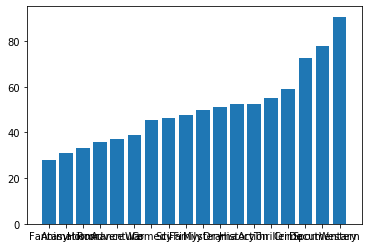

In [69]:

Pop_per_genre = plt.bar(sorted_thing.index, sorted_thing)

plt.xlabel = 'Genres'
plt.ylabel = 'Popularity Ranking'
plt.title = 'Popularity Ranking Per Genre'


In [70]:
new_df['Genre']

327                          [Action & Adventure, Drama]
2                  [Animation, Comedy, Sci-Fi & Fantasy]
355                   [Drama, Mystery, Sci-Fi & Fantasy]
377                                     [Drama, Mystery]
121                                      [Comedy, Drama]
379                              [Crime, Drama, Mystery]
102               [Sci-Fi & Fantasy, Action & Adventure]
143                            [Sci-Fi & Fantasy, Drama]
233                   [Mystery, Sci-Fi & Fantasy, Drama]
203                                              [Drama]
202                                  [Comedy, Animation]
61                             [Sci-Fi & Fantasy, Drama]
286                                              [Drama]
288                           [Animation, Comedy, Drama]
132                                      [Comedy, Drama]
3                                                [Drama]
92                             [Sci-Fi & Fantasy, Drama]
117    [Sci-Fi & Fantasy, Anima

In [71]:
movie_db_uniques = []
for i in new_df['Genre']:
    for j in i:
        if j not in movie_db_uniques:
            movie_db_uniques.append(j)
movie_db_uniques

['Action & Adventure',
 'Drama',
 'Animation',
 'Comedy',
 'Sci-Fi & Fantasy',
 'Mystery',
 'Crime',
 'Fantasy',
 'Horror',
 'Romance',
 'Western',
 'Science Fiction',
 'War & Politics',
 'Documentary',
 'Family',
 'Action',
 'Talk',
 'Adventure',
 'Kids',
 'History',
 'War']

In [72]:
for i in movie_db_uniques:
    new_df[i] = 0

In [73]:
new_df.head()

Show ID            Name  Popularity Country  Year  Rating  \
327    44217         Vikings     155.957    [CA]  2013     7.5   
2      60625  Rick and Morty     155.733    [US]  2013     8.6   
355     1622    Supernatural     139.520    [US]  2005     7.5   
377    69050       Riverdale     100.477    [US]  2017     7.4   
121    81356   Sex Education      87.559    [GB]  2019     8.1   

                                     Genre  Action & Adventure  Drama  \
327            [Action & Adventure, Drama]                   0      0   
2    [Animation, Comedy, Sci-Fi & Fantasy]                   0      0   
355     [Drama, Mystery, Sci-Fi & Fantasy]                   0      0   
377                       [Drama, Mystery]                   0      0   
121                        [Comedy, Drama]                   0      0   

     Animation  ...  Science Fiction  War & Politics  Documentary  Family  \
327          0  ...                0               0            0       0   
2            0  ...                0               0            0       0   
355          0  ...                0               0            0       0   
377          0  ...                0               0            0       0   
121          0  ...                0               0            0       0   

     Action  Talk  Adventure  Kids  History  War  
327       0     0          0     0        0    0  
2         0     0          0     0        0    0  
355       0     0          0     0        0    0  
377       0     0          0     0        0    0  
121       0     0          0     0        0    0  

[5 rows x 28 columns]

In [74]:
for i in range(len(new_df['Name'])):
    for j in movie_db_uniques:
        if j in new_df['Genre'][i]:
            new_df[j][i] = 1

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
new_df.head()

Show ID            Name  Popularity Country  Year  Rating  \
327    44217         Vikings     155.957    [CA]  2013     7.5   
2      60625  Rick and Morty     155.733    [US]  2013     8.6   
355     1622    Supernatural     139.520    [US]  2005     7.5   
377    69050       Riverdale     100.477    [US]  2017     7.4   
121    81356   Sex Education      87.559    [GB]  2019     8.1   

                                     Genre  Action & Adventure  Drama  \
327            [Action & Adventure, Drama]                   1      1   
2    [Animation, Comedy, Sci-Fi & Fantasy]                   0      0   
355     [Drama, Mystery, Sci-Fi & Fantasy]                   0      1   
377                       [Drama, Mystery]                   0      1   
121                        [Comedy, Drama]                   0      1   

     Animation  ...  Science Fiction  War & Politics  Documentary  Family  \
327          0  ...                0               0            0       0   
2            1  ...                0               0            0       0   
355          0  ...                0               0            0       0   
377          0  ...                0               0            0       0   
121          0  ...                0               0            0       0   

     Action  Talk  Adventure  Kids  History  War  
327       0     0          0     0        0    0  
2         0     0          0     0        0    0  
355       0     0          0     0        0    0  
377       0     0          0     0        0    0  
121       0     0          0     0        0    0  

[5 rows x 28 columns]

In [76]:
movie_db_dict = dict.fromkeys(movie_db_uniques, 0.0)
movie_db_dict

{'Action & Adventure': 0.0,
 'Drama': 0.0,
 'Animation': 0.0,
 'Comedy': 0.0,
 'Sci-Fi & Fantasy': 0.0,
 'Mystery': 0.0,
 'Crime': 0.0,
 'Fantasy': 0.0,
 'Horror': 0.0,
 'Romance': 0.0,
 'Western': 0.0,
 'Science Fiction': 0.0,
 'War & Politics': 0.0,
 'Documentary': 0.0,
 'Family': 0.0,
 'Action': 0.0,
 'Talk': 0.0,
 'Adventure': 0.0,
 'Kids': 0.0,
 'History': 0.0,
 'War': 0.0}

In [77]:
for i in range(len(new_df['Name'])):
    for j in movie_db_uniques:
        if new_df[j][i] == 1:
            movie_db_dict[j] += (float(new_df['Popularity'][i])/(new_df[j].sum()))

In [78]:
movie_db_dict

{'Action & Adventure': 24.402488372093025,
 'Drama': 24.83366527196653,
 'Animation': 22.27797260273973,
 'Comedy': 21.35126086956522,
 'Sci-Fi & Fantasy': 25.35886956521739,
 'Mystery': 24.151220588235294,
 'Crime': 23.157159999999998,
 'Fantasy': 28.872999999999998,
 'Horror': 34.197,
 'Romance': 34.944,
 'Western': 17.329,
 'Science Fiction': 40.082,
 'War & Politics': 14.893222222222223,
 'Documentary': 12.270692307692308,
 'Family': 16.8386875,
 'Action': 17.2655,
 'Talk': 19.9685,
 'Adventure': 14.895499999999998,
 'Kids': 12.9255,
 'History': 13.6155,
 'War': 10.981}

In [79]:
normalized_popularity = pd.Series(movie_db_dict)
normalized_popularity

Action & Adventure    24.402488
Drama                 24.833665
Animation             22.277973
Comedy                21.351261
Sci-Fi & Fantasy      25.358870
Mystery               24.151221
Crime                 23.157160
Fantasy               28.873000
Horror                34.197000
Romance               34.944000
Western               17.329000
Science Fiction       40.082000
War & Politics        14.893222
Documentary           12.270692
Family                16.838687
Action                17.265500
Talk                  19.968500
Adventure             14.895500
Kids                  12.925500
History               13.615500
War                   10.981000
dtype: float64

In [80]:
sorted_thing2 = normalized_popularity.sort_values(ascending=False)
sorted_thing2

Science Fiction       40.082000
Romance               34.944000
Horror                34.197000
Fantasy               28.873000
Sci-Fi & Fantasy      25.358870
Drama                 24.833665
Action & Adventure    24.402488
Mystery               24.151221
Crime                 23.157160
Animation             22.277973
Comedy                21.351261
Talk                  19.968500
Western               17.329000
Action                17.265500
Family                16.838687
Adventure             14.895500
War & Politics        14.893222
History               13.615500
Kids                  12.925500
Documentary           12.270692
War                   10.981000
dtype: float64

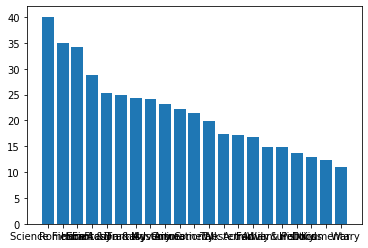

In [81]:
Popular_plot = plt.bar(sorted_thing2.index, sorted_thing2)

plt.xlabel = 'Genres'
plt.ylabel = 'Popularity Ranking'
plt.title = 'Popularity Ranking Per Genre'

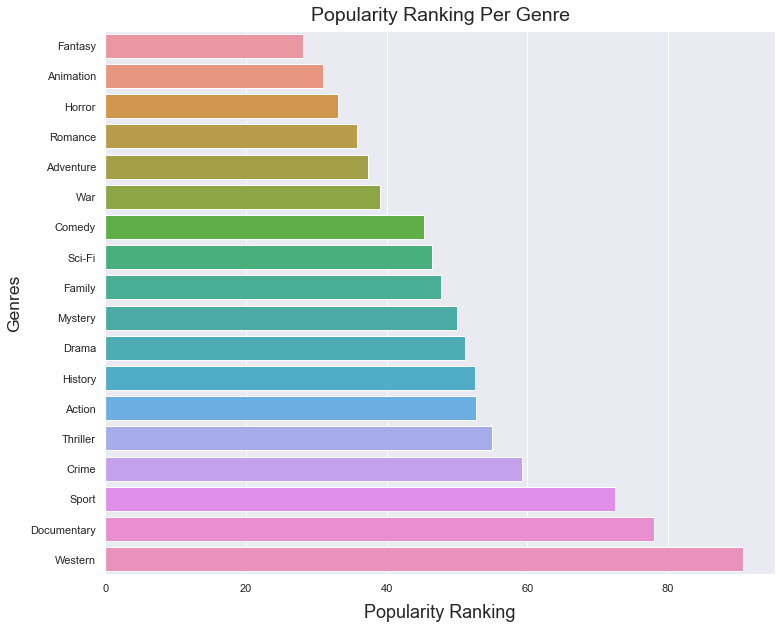

In [328]:
bar_genres = sns.barplot(x=sorted_thing, y=sorted_thing.index, orient = 'h') #general bar graph, given data

bar_genres.axes.set_title('Popularity Ranking Per Genre', fontsize = 19.5, pad = 10) # title info
bar_genres.set_xlabel('Popularity Ranking', fontsize = 18, labelpad = 10) # xlabel info
bar_genres.set_ylabel('Genres', fontsize = 17.5, labelpad = 8) # ylabel info

sns.set(rc = {'figure.figsize':(10,8)}) # change graph size

Overlapping Genres in top 10:
Fantasy (1,4)
Animation (2,10)
Horror (3,3)
Romance (4,2)
Act/Adv (5,7)
Sci-Fi (8,1)
Drama (11,6)
Mystery (10,8)

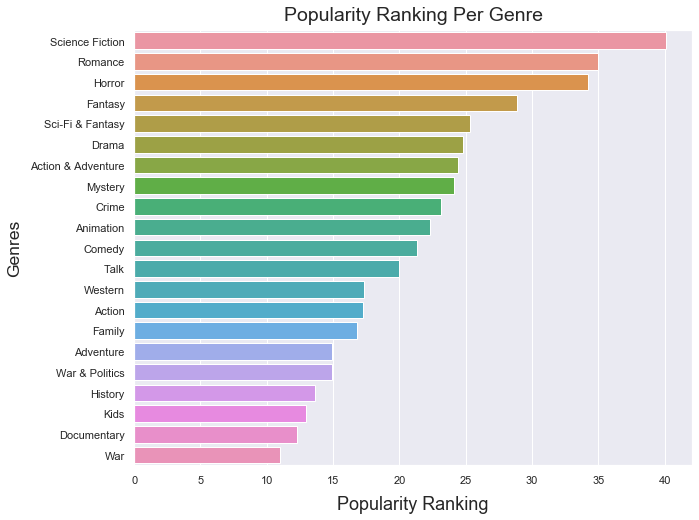

In [329]:
bar2_genres = sns.barplot(x=sorted_thing2, y=sorted_thing2.index, orient = 'h') #general bar graph, given data

bar2_genres.axes.set_title('Popularity Ranking Per Genre', fontsize = 19.5, pad = 10) # title info
bar2_genres.set_xlabel('Popularity Ranking', fontsize = 18, labelpad = 10) # xlabel info
bar2_genres.set_ylabel('Genres', fontsize = 17.5, labelpad = 8) # ylabel info

sns.set(rc = {'figure.figsize':(10,8)}) # change graph size

In [84]:
new_df.head()

Show ID            Name  Popularity Country  Year  Rating  \
327    44217         Vikings     155.957    [CA]  2013     7.5   
2      60625  Rick and Morty     155.733    [US]  2013     8.6   
355     1622    Supernatural     139.520    [US]  2005     7.5   
377    69050       Riverdale     100.477    [US]  2017     7.4   
121    81356   Sex Education      87.559    [GB]  2019     8.1   

                                     Genre  Action & Adventure  Drama  \
327            [Action & Adventure, Drama]                   1      1   
2    [Animation, Comedy, Sci-Fi & Fantasy]                   0      0   
355     [Drama, Mystery, Sci-Fi & Fantasy]                   0      1   
377                       [Drama, Mystery]                   0      1   
121                        [Comedy, Drama]                   0      1   

     Animation  ...  Science Fiction  War & Politics  Documentary  Family  \
327          0  ...                0               0            0       0   
2            1  ...                0               0            0       0   
355          0  ...                0               0            0       0   
377          0  ...                0               0            0       0   
121          0  ...                0               0            0       0   

     Action  Talk  Adventure  Kids  History  War  
327       0     0          0     0        0    0  
2         0     0          0     0        0    0  
355       0     0          0     0        0    0  
377       0     0          0     0        0    0  
121       0     0          0     0        0    0  

[5 rows x 28 columns]

In [157]:
box_plot_dict = dict.fromkeys(movie_db_uniques, [])

In [158]:
box_plot_dict

{'Action & Adventure': [],
 'Drama': [],
 'Animation': [],
 'Comedy': [],
 'Sci-Fi & Fantasy': [],
 'Mystery': [],
 'Crime': [],
 'Fantasy': [],
 'Horror': [],
 'Romance': [],
 'Western': [],
 'Science Fiction': [],
 'War & Politics': [],
 'Documentary': [],
 'Family': [],
 'Action': [],
 'Talk': [],
 'Adventure': [],
 'Kids': [],
 'History': [],
 'War': []}

In [334]:
import copy
new_df_copy = copy.deepcopy(new_df)
new_df_copy

for i in movie_db_uniques:
    for j in range(len(new_df_copy[i])):
        if new_df_copy[i][j] == 0:
            new_df_copy[i][j] = None

for i in movie_db_uniques:
    new_df_copy[i] = new_df_copy['Popularity']*(new_df_copy[i])
new_df_copy.describe()


/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Show ID  Popularity      Rating  Action & Adventure       Drama  \
count    380.000000  380.000000  380.000000           86.000000  239.000000   
mean   31221.265789   23.030147    7.866316           24.402488   24.833665   
std    29853.515056   18.669318    0.280354           19.853065   19.340756   
min       45.000000    5.303000    7.400000            5.795000    6.953000   
25%     1972.750000   12.018750    7.700000           13.718500   12.918000   
50%    20697.500000   17.768500    7.900000           18.461500   18.943000   
75%    62089.000000   27.419500    8.100000           29.433750   29.605500   
max    90027.000000  155.957000    9.400000          155.957000  155.957000   

        Animation      Comedy  Sci-Fi & Fantasy     Mystery      Crime  ...  \
count   73.000000  138.000000        115.000000   68.000000  75.000000  ...   
mean    22.277973   21.351261         25.358870   24.151221  23.157160  ...   
std     20.574356   18.228717         22.530384   22.316103  13.545249  ...   
min      5.437000    5.437000          5.795000    7.298000   7.658000  ...   
25%     12.073000   11.206000         12.205000   12.060750  13.571000  ...   
50%     17.981000   15.971500         18.619000   16.603000  19.498000  ...   
75%     23.283000   24.628750         28.815000   27.756750  28.480500  ...   
max    155.733000  155.733000        155.733000  139.520000  81.511000  ...   

       Science Fiction  War & Politics  Documentary     Family     Action  \
count            1.000        9.000000    13.000000  16.000000   4.000000   
mean            40.082       14.893222    12.270692  16.838687  17.265500   
std                NaN        9.844982     5.972642   5.829505   5.733276   
min             40.082        7.084000     5.303000   7.819000  12.889000   
25%             40.082        8.604000     8.711000  12.256500  14.289250   
50%             40.082       11.077000     9.543000  17.298500  15.246000   
75%             40.082       19.349000    15.764000  20.916500  18.222250   
max             40.082       37.465000    27.967000  27.317000  25.681000   

            Talk  Adventure       Kids    History     War  
count   2.000000   4.000000   2.000000   2.000000   1.000  
mean   19.968500  14.895500  12.925500  13.615500  10.981  
std     2.250721   3.910127   7.221682   3.725746     NaN  
min    18.377000  10.981000   7.819000  10.981000  10.981  
25%    19.172750  12.412000  10.372250  12.298250  10.981  
50%    19.968500  14.312500  12.925500  13.615500  10.981  
75%    20.764250  16.796000  15.478750  14.932750  10.981  
max    21.560000  19.976000  18.032000  16.250000  10.981  

[8 rows x 24 columns]

'I Am Not an Animal'

In [248]:
for j in movie_db_uniques:
    box_plot_dict[j] = set(new_df_copy[j])
    box_plot_dict[j].remove(0.0)
    box_plot_dict[j] = list(box_plot_dict[j])

In [211]:
box_plot_dict

{'Action & Adventure': [5.795,
  6.719,
  7.084,
  8.643,
  9.253,
  10.981,
  11.617,
  12.073,
  13.729,
  14.853,
  15.937,
  16.492,
  17.734,
  18.99,
  19.964,
  18.943,
  21.476,
  22.974,
  23.283,
  24.521,
  25.233,
  26.155,
  27.93,
  25.059,
  29.462,
  30.34,
  29.349,
  29.041,
  33.811,
  34.069,
  33.782,
  37.859,
  38.885,
  39.958,
  39.0,
  37.808,
  37.465,
  43.257,
  44.341,
  43.106,
  37.371,
  47.549,
  8.604,
  49.655,
  51.691,
  52.194,
  10.506,
  11.241,
  11.201,
  59.168,
  14.759,
  15.796,
  15.71,
  15.25,
  79.869,
  17.57,
  18.692,
  18.619,
  23.091,
  24.058,
  155.957,
  10.452,
  12.022,
  14.147,
  15.83,
  15.248,
  15.245,
  6.587,
  8.48,
  11.367,
  11.239,
  13.715,
  14.614,
  17.684,
  17.199,
  18.471,
  18.452,
  18.34,
  18.032,
  21.257,
  21.236,
  25.124,
  8.161,
  11.051,
  13.545,
  15.594],
 'Drama': [6.953,
  7.658,
  8.948,
  9.821,
  10.981,
  11.68,
  12.765,
  13.961,
  14.759,
  15.937,
  16.771,
  17.947,
  18.943,
  

In [212]:
type(box_plot_dict['Fantasy'])

list

In [213]:
box_plot_dict['Fantasy']

[34.209, 12.889, 14.756, 53.638]

In [223]:
movie_db_uniques

['Action & Adventure',
 'Drama',
 'Animation',
 'Comedy',
 'Sci-Fi & Fantasy',
 'Mystery',
 'Crime',
 'Fantasy',
 'Horror',
 'Romance',
 'Western',
 'Science Fiction',
 'War & Politics',
 'Documentary',
 'Family',
 'Action',
 'Talk',
 'Adventure',
 'Kids',
 'History',
 'War']

In [294]:
other_new_df = new_df_copy.loc[:,'Action & Adventure':'War']

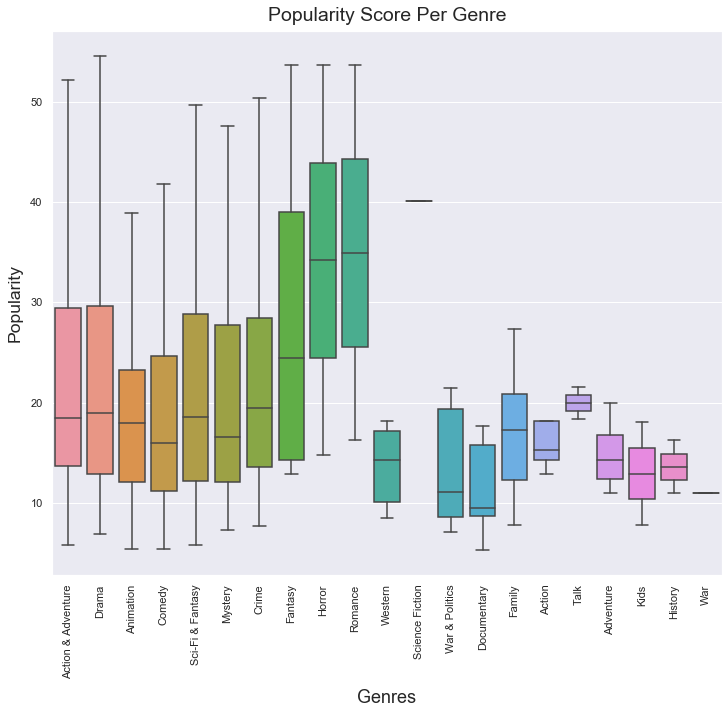

In [341]:
boxplot = sns.boxplot(data=other_new_df, showfliers = False)

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
boxplot.axes.set_title('Popularity Score Per Genre', fontsize = 19.5, pad = 10) # title info
boxplot.set_xlabel('Genres', fontsize = 18, labelpad = 10) # xlabel info
boxplot.set_ylabel('Popularity', fontsize = 17.5, labelpad = 8) # ylabel info

# sns.palplot(sns.diverging_palette(255,133,l=60,n=7,center='dark'))
sns.set(rc = {'figure.figsize':(12,10)})

Overlapping Genres in top 10:
Fantasy (1,4)
Animation (2,10)
Horror (3,3)
Romance (4,2)
Act/Adv (5,7)
Sci-Fi (8,1)
Drama (11,6)
Mystery (10,8)

In [359]:
other_new_df2 = other_new_df[['Science Fiction', 'Romance', 'Horror', 'Fantasy', 'Drama', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Animation', 'Mystery']]
other_new_df2

Science Fiction  Romance  Horror  Fantasy    Drama  Action & Adventure  \
327              NaN      NaN     NaN      NaN  155.957             155.957   
2                NaN      NaN     NaN      NaN      NaN                 NaN   
355              NaN      NaN     NaN      NaN  139.520                 NaN   
377              NaN      NaN     NaN      NaN  100.477                 NaN   
121              NaN      NaN     NaN      NaN   87.559                 NaN   
379              NaN      NaN     NaN      NaN   81.511                 NaN   
102              NaN      NaN     NaN      NaN      NaN              79.869   
143              NaN      NaN     NaN      NaN   74.295                 NaN   
233              NaN      NaN     NaN      NaN   69.837                 NaN   
203              NaN      NaN     NaN      NaN   68.361                 NaN   
202              NaN      NaN     NaN      NaN      NaN                 NaN   
61               NaN      NaN     NaN      NaN   66.319                 NaN   
286              NaN      NaN     NaN      NaN   65.790                 NaN   
288              NaN      NaN     NaN      NaN   65.501                 NaN   
132              NaN      NaN     NaN      NaN   65.397                 NaN   
3                NaN      NaN     NaN      NaN   60.149                 NaN   
92               NaN      NaN     NaN      NaN   60.112                 NaN   
117              NaN      NaN     NaN      NaN      NaN              59.168   
309              NaN      NaN     NaN      NaN      NaN                 NaN   
345              NaN      NaN     NaN      NaN   54.587                 NaN   
365              NaN   53.638  53.638   53.638   53.638                 NaN   
32               NaN      NaN     NaN      NaN   52.837                 NaN   
12               NaN      NaN     NaN      NaN   52.194              52.194   
310              NaN      NaN     NaN      NaN   51.691              51.691   
228              NaN      NaN     NaN      NaN      NaN                 NaN   
262              NaN      NaN     NaN      NaN      NaN              49.655   
174              NaN      NaN     NaN      NaN   48.725                 NaN   
299              NaN      NaN     NaN      NaN   48.672                 NaN   
317              NaN      NaN     NaN      NaN      NaN                 NaN   
221              NaN      NaN     NaN      NaN   47.549              47.549   
289              NaN      NaN     NaN      NaN   45.141                 NaN   
366              NaN      NaN     NaN      NaN   44.341              44.341   
8                NaN      NaN     NaN      NaN   43.673                 NaN   
74               NaN      NaN     NaN      NaN      NaN              43.257   
234              NaN      NaN     NaN      NaN   43.106              43.106   
314              NaN      NaN     NaN      NaN   42.534                 NaN   
122              NaN      NaN     NaN      NaN   42.382                 NaN   
146              NaN      NaN     NaN      NaN      NaN                 NaN   
256              NaN      NaN     NaN      NaN   41.153                 NaN   
269              NaN      NaN     NaN      NaN   41.087                 NaN   
321              NaN      NaN     NaN      NaN   40.619                 NaN   
76               NaN      NaN     NaN      NaN   40.615                 NaN   
69            40.082      NaN     NaN      NaN      NaN                 NaN   
53               NaN      NaN     NaN      NaN      NaN                 NaN   
176              NaN      NaN     NaN      NaN   39.958              39.958   
323              NaN      NaN     NaN      NaN   39.000              39.000   
227              NaN      NaN     NaN      NaN      NaN              38.885   
318              NaN      NaN     NaN      NaN   38.517                 NaN   
72               NaN      NaN     NaN      NaN      NaN              37.859   
63               NaN      NaN     NaN      NaN   37.808

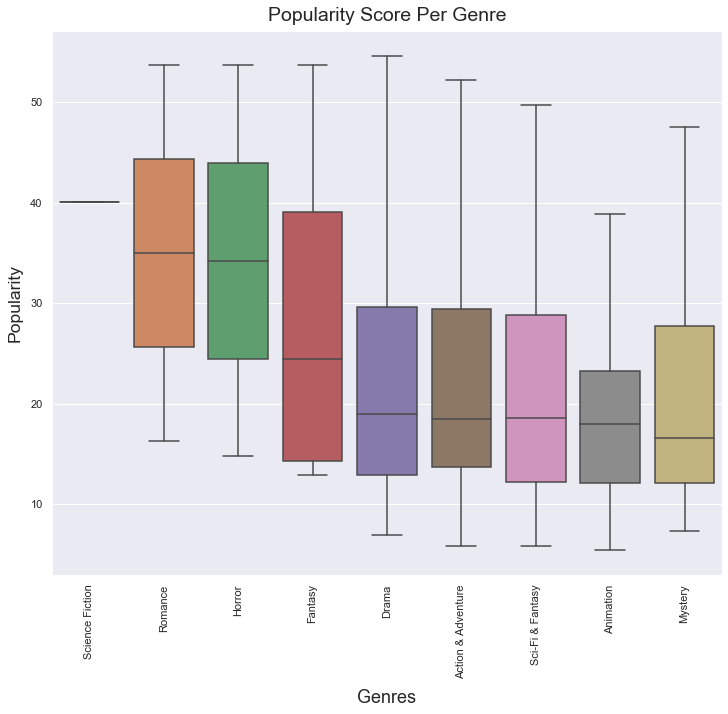

In [360]:
boxplot = sns.boxplot(data=other_new_df2, showfliers = False)

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
boxplot.axes.set_title('Popularity Score Per Genre', fontsize = 19.5, pad = 10) # title info
boxplot.set_xlabel('Genres', fontsize = 18, labelpad = 10) # xlabel info
boxplot.set_ylabel('Popularity', fontsize = 17.5, labelpad = 8) # ylabel info

# sns.palplot(sns.diverging_palette(255,133,l=60,n=7,center='dark'))
sns.set(rc = {'figure.figsize':(12,10)})

In [361]:
other_new_df2.describe()

Science Fiction    Romance     Horror    Fantasy       Drama  \
count            1.000   2.000000   2.000000   4.000000  239.000000   
mean            40.082  34.944000  34.197000  28.873000   24.833665   
std                NaN  26.437308  27.493726  19.118543   19.340756   
min             40.082  16.250000  14.756000  12.889000    6.953000   
25%             40.082  25.597000  24.476500  14.289250   12.918000   
50%             40.082  34.944000  34.197000  24.482500   18.943000   
75%             40.082  44.291000  43.917500  39.066250   29.605500   
max             40.082  53.638000  53.638000  53.638000  155.957000   

       Action & Adventure  Sci-Fi & Fantasy   Animation     Mystery  
count           86.000000        115.000000   73.000000   68.000000  
mean            24.402488         25.358870   22.277973   24.151221  
std             19.853065         22.530384   20.574356   22.316103  
min              5.795000          5.795000    5.437000    7.298000  
25%             13.718500         12.205000   12.073000   12.060750  
50%             18.461500         18.619000   17.981000   16.603000  
75%             29.433750         28.815000   23.283000   27.756750  
max            155.957000        155.733000  155.733000  139.520000

In [362]:
other_new_df

Action & Adventure    Drama  Animation   Comedy  Sci-Fi & Fantasy  \
327             155.957  155.957        NaN      NaN               NaN   
2                   NaN      NaN    155.733  155.733           155.733   
355                 NaN  139.520        NaN      NaN           139.520   
377                 NaN  100.477        NaN      NaN               NaN   
121                 NaN   87.559        NaN   87.559               NaN   
379                 NaN   81.511        NaN      NaN               NaN   
102              79.869      NaN        NaN      NaN            79.869   
143                 NaN   74.295        NaN      NaN            74.295   
233                 NaN   69.837        NaN      NaN            69.837   
203                 NaN   68.361        NaN      NaN               NaN   
202                 NaN      NaN     67.589   67.589               NaN   
61                  NaN   66.319        NaN      NaN            66.319   
286                 NaN   65.790        NaN      NaN               NaN   
288                 NaN   65.501     65.501   65.501               NaN   
132                 NaN   65.397        NaN   65.397               NaN   
3                   NaN   60.149        NaN      NaN               NaN   
92                  NaN   60.112        NaN      NaN            60.112   
117              59.168      NaN     59.168   59.168            59.168   
309                 NaN      NaN        NaN      NaN            56.120   
345                 NaN   54.587        NaN      NaN            54.587   
365                 NaN   53.638        NaN      NaN               NaN   
32                  NaN   52.837        NaN   52.837               NaN   
12               52.194   52.194     52.194   52.194               NaN   
310              51.691   51.691        NaN      NaN               NaN   
228                 NaN      NaN        NaN   50.350               NaN   
262              49.655      NaN     49.655      NaN            49.655   
174                 NaN   48.725        NaN   48.725               NaN   
299                 NaN   48.672        NaN      NaN               NaN   
317                 NaN      NaN        NaN   48.399               NaN   
221              47.549   47.549        NaN      NaN            47.549   
289                 NaN   45.141        NaN      NaN               NaN   
366              44.341   44.341        NaN      NaN               NaN   
8                   NaN   43.673        NaN      NaN            43.673   
74               43.257      NaN        NaN      NaN            43.257   
234              43.106   43.106        NaN      NaN            43.106   
314                 NaN   42.534        NaN      NaN               NaN   
122                 NaN   42.382        NaN      NaN            42.382   
146                 NaN      NaN        NaN   41.857            41.857   
256                 NaN   41.153        NaN      NaN               NaN   
269                 NaN   41.087        NaN   41.087               NaN   
321                 NaN   40.619        NaN      NaN               NaN   
76                  NaN   40.615        NaN      NaN            40.615   
69                  NaN      NaN        NaN      NaN               NaN   
53                  NaN      NaN        NaN   39.982               NaN   
176              39.958   39.958        NaN      NaN            39.958   
323              39.000   39.000        NaN      NaN               NaN   
227              38.885      NaN     38.885      NaN            38.885   
318                 NaN   38.517        NaN      NaN               NaN   
72               37.859      NaN        NaN      NaN            37.859   
63               37.808   37.808        NaN      NaN            37.808   
357              37.465   37.465        NaN      NaN               NaN   
252              37.371   37.371     37.371   37.371               NaN   
140                 NaN   37.200        NaN      NaN               NaN   
31       

In [363]:
new_df

Show ID                                           Name  Popularity  \
327    44217                                        Vikings     155.957   
2      60625                                 Rick and Morty     155.733   
355     1622                                   Supernatural     139.520   
377    69050                                      Riverdale     100.477   
121    81356                                  Sex Education      87.559   
379     4057                                 Criminal Minds      81.511   
102    82856                                The Mandalorian      79.869   
143    79460                                       Legacies      74.295   
233    79242                 Chilling Adventures of Sabrina      69.837   
203    71712                                The Good Doctor      68.361   
202     2190                                     South Park      67.589   
61      1399                                Game of Thrones      66.319   
286    44006                                   Chicago Fire      65.790   
288    31910                               Naruto Shippūden      65.501   
132     1668                                        Friends      65.397   
3       1396                                   Breaking Bad      60.149   
92     71912                                    The Witcher      60.112   
117    12971                                  Dragon Ball Z      59.168   
309    63174                                        Lucifer      56.120   
345    68507                             His Dark Materials      54.587   
365    18165                            The Vampire Diaries      53.638   
32      1408                                          House      52.837   
12     46298                                Hunter x Hunter      52.194   
310     2288                                   Prison Break      51.691   
228    48891                             Brooklyn Nine-Nine      50.350   
262     4194                      Star Wars: The Clone Wars      49.655   
174    34307                                      Shameless      48.725   
299      549                                    Law & Order      48.672   
317     1100                          How I Met Your Mother      48.399   
221     4607                                           Lost      47.549   
289     5920                                  The Mentalist      45.141   
366    71790                                       S.W.A.T.      44.341   
8      66732                                Stranger Things      43.673   
74     76479                                       The Boys      43.257   
234    75450                                         Titans      43.106   
314    54650                                          Power      42.534   
122      253                                      Star Trek      42.382   
146    66573                                 The Good Place      41.857   
256    58841                                   Chicago P.D.      41.153   
269     1695                                           Monk      41.087   
321    37680                                          Suits      40.619   
76      4087                                    The X-Files      40.615   
69     63247                                      Westworld      40.082   
53      2316                                     The Office      39.982   
176      121                                     Doctor Who      39.958   
323    75219                                          9-1-1      39.000   
227    30984                                         Bleach      38.885   
318     1419                                         Castle      38.517   
72      4629                                  Stargate SG-1      37.859   
63       655                 Star Trek: The Next Generation      37.808   
357     1407                                       Homeland      37.465   
252    46260                                         Naruto      37.371   
140    62560                  